In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('./ml_source_files/advertising.csv')
df.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


In [60]:
# eda / preprocessing

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

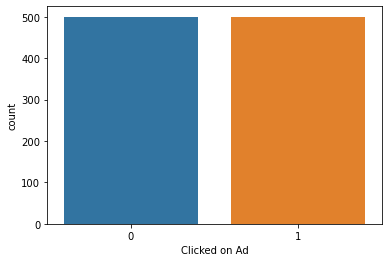

In [62]:
sns.countplot(x = 'Clicked on Ad', data = df)

In [63]:
# 광고를 클릭할지 여부를 판별하는 모델을 생성

In [64]:
y = df['Clicked on Ad']

In [65]:
x = df[['Area Income', 'Daily Time Spent on Site', 'Age', 'Daily Internet Usage', 'Male']]

In [66]:
# train test split

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 111)

In [69]:
# algorithm import

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
log = LogisticRegression()

In [72]:
# algo train

In [73]:
log.fit(x_train, y_train)

LogisticRegression()

In [52]:
# prediction

In [53]:
preds = log.predict(x_test)
preds

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0], dtype=int64)

In [54]:
# model evaluation

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
confusion_matrix(y_test, preds)

array([[94,  4],
       [11, 91]], dtype=int64)

In [57]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        98
           1       0.96      0.89      0.92       102

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.92       200

